# Librerías

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import networkx as nx

from visibility_graph import visibility_graph
from ts2vg import HorizontalVG

import collections

from scipy import stats

# Datos

In [12]:
URL = "https://raw.githubusercontent.com/rvive/CIENCIA-DE-DATOS-QROO/main/QROO_TURISMO.csv"
df = pd.read_csv(URL, on_bad_lines='skip')
df

,AÑO,MES,NACIONAL,INTERNACIONAL,TOTAL
0,1992,Ene,130019.0000,9.177820e+05,1047801.000
1,1992,Feb,114830.0000,9.221250e+05,1036955.000
2,1992,Mar,135694.0000,1.018577e+06,1154271.000
3,1992,Abr,189975.0000,7.809790e+05,970954.000
4,1992,May,149395.0000,7.055310e+05,854926.000
...,...,...,...,...,...
343,2020,Ago,474119.3239,9.817523e+05,1455871.580
344,2020,Sep,468114.9010,1.109513e+06,1577627.688
345,2020,Oct,512726.1573,1.491180e+06,2003906.222
346,2020,Nov,597153.9469,2.025786e+06,2622940.057


In [13]:
df['MES'] = df['MES'].map({'Ene':'01',
                           'Feb':'02',
                           'Mar':'03',
                           'Abr':'04',
                           'May':'05',
                           'Jun':'06',
                           'Jul':'07',
                           'Ago':'08',
                           'Sep':'09',
                           'Oct':'10',
                           'Nov':'11',
                           'Dic':'12'})

df['AÑO'] = df['AÑO'].astype(str)
df['MES'] = df['MES'].astype(str)


df['FECHA'] = df['AÑO']+'-'+df['MES']

df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y/%m')
df = df.set_index('FECHA')

data = df.drop(df.columns[[0,1]], axis='columns')
data

,NACIONAL,INTERNACIONAL,TOTAL
FECHA,,,
1992-01-01,130019.0000,9.177820e+05,1047801.000
1992-02-01,114830.0000,9.221250e+05,1036955.000
1992-03-01,135694.0000,1.018577e+06,1154271.000
1992-04-01,189975.0000,7.809790e+05,970954.000
1992-05-01,149395.0000,7.055310e+05,854926.000
...,...,...,...
2020-08-01,474119.3239,9.817523e+05,1455871.580
2020-09-01,468114.9010,1.109513e+06,1577627.688
2020-10-01,512726.1573,1.491180e+06,2003906.222


<Axes: xlabel='FECHA'>

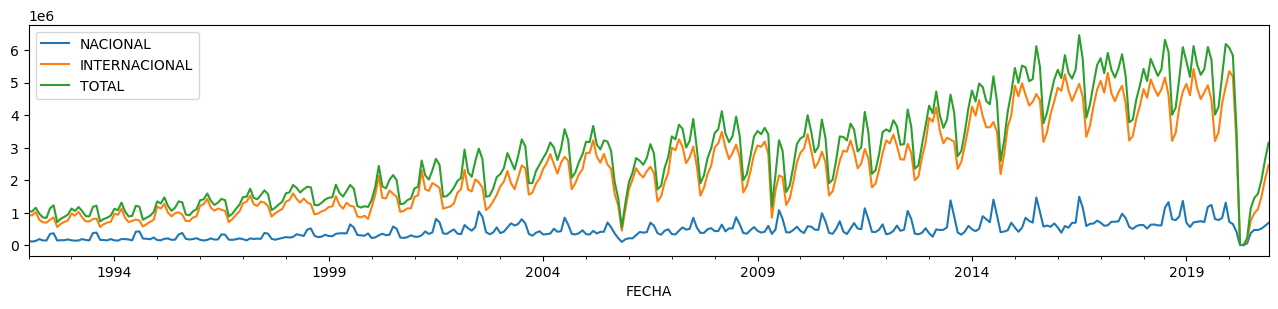

In [14]:
fix, ax = plt.subplots(figsize=(16,3))
data.plot(ax=ax)

**Máscara que permite seleccionar los años a estudiar**

In [15]:
mask = (data.index > '1992-01-01') & (data.index <= '2020-12-01')
fil_df = data.loc[mask]

<Axes: xlabel='FECHA'>

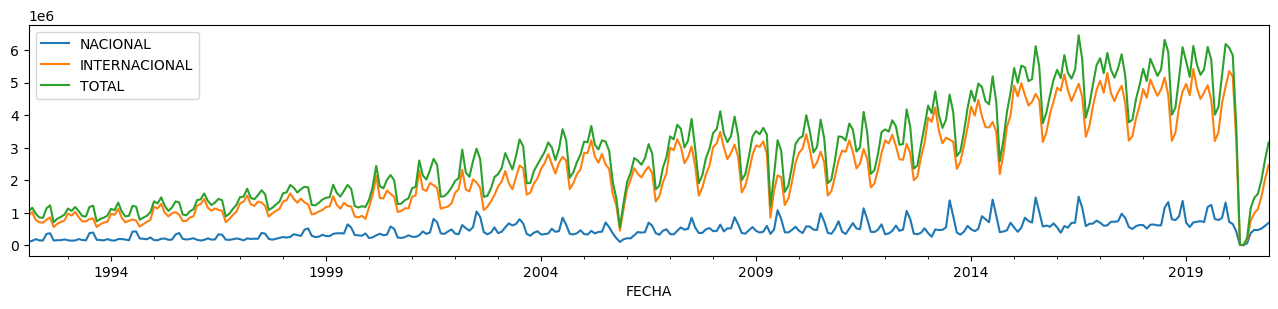

In [16]:
fix, ax = plt.subplots(figsize=(16,3))
fil_df.plot(ax=ax)

# Construcción de la red

#### Implementación del HVG para transformar la serie de tiempo en un grafo 

In [17]:
gn = HorizontalVG()
gn.build(fil_df['NACIONAL'])

gi = HorizontalVG()
gi.build(fil_df['INTERNACIONAL'])

gt = HorizontalVG()
gt.build(fil_df['TOTAL'])

**Cambio a un grafo manejable con Networkx**

In [18]:
GN = gn.as_networkx()
GI = gi.as_networkx()
GT = gt.as_networkx()

**Dibujo del grafo**

<Axes: title={'center': 'Turistas noche total mensual'}, xlabel='FECHA'>

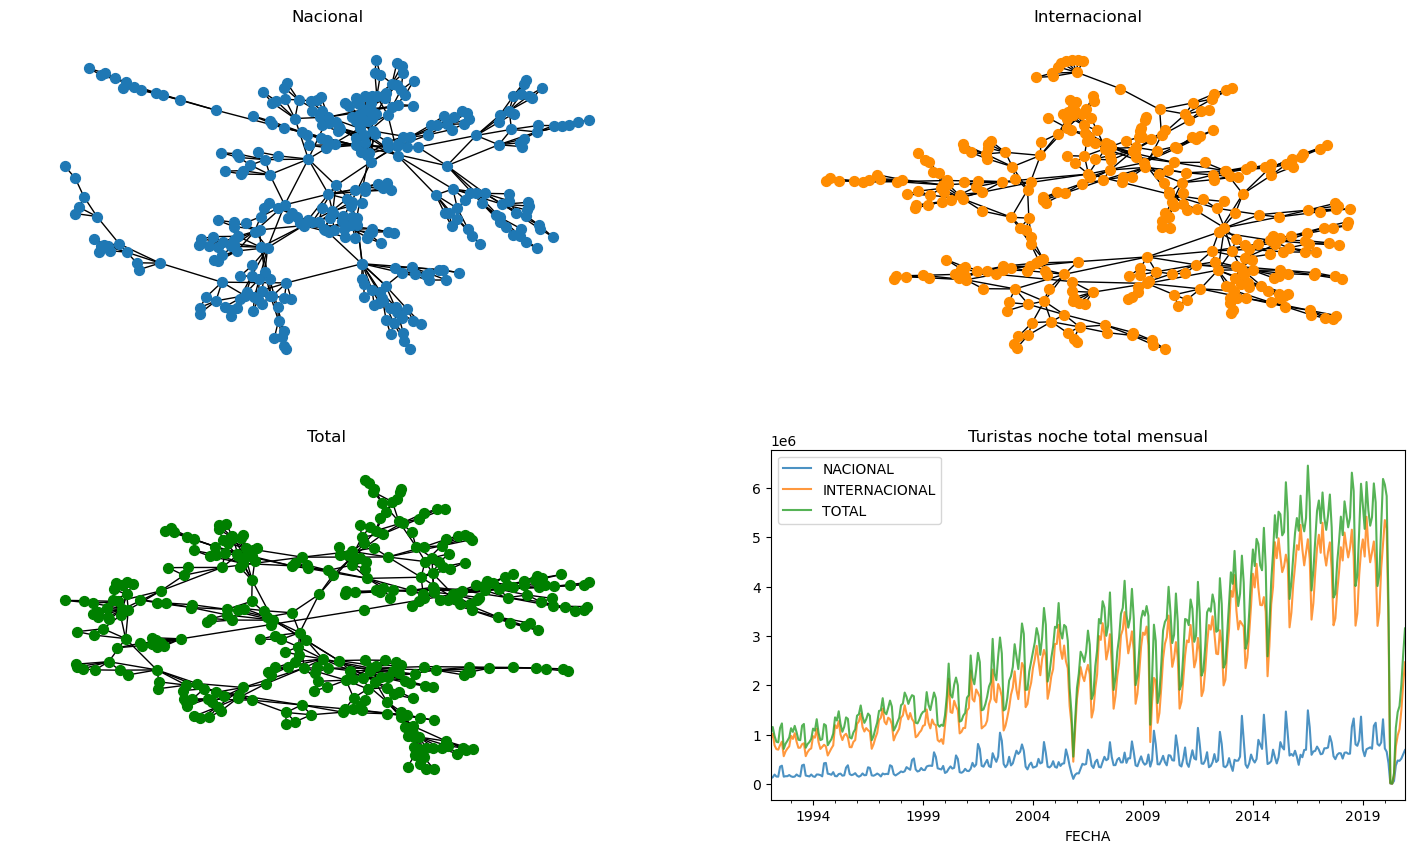

In [25]:
plt.figure(figsize=(18,10))

subax1 = plt.subplot(221)
plt.title('Nacional')
nx.draw(GN, node_size=50, ax=subax1)

subax2 = plt.subplot(222)
plt.title('Internacional')
nx.draw(GI, node_size=50, node_color='darkorange', ax=subax2)

subax3 = plt.subplot(223)
plt.title('Total')
nx.draw(GT, node_size=50, node_color='green', ax=subax3)

subax4 = plt.subplot(224)
plt.title('Turistas noche total mensual')
fil_df.plot(ax=subax4, alpha=0.8)

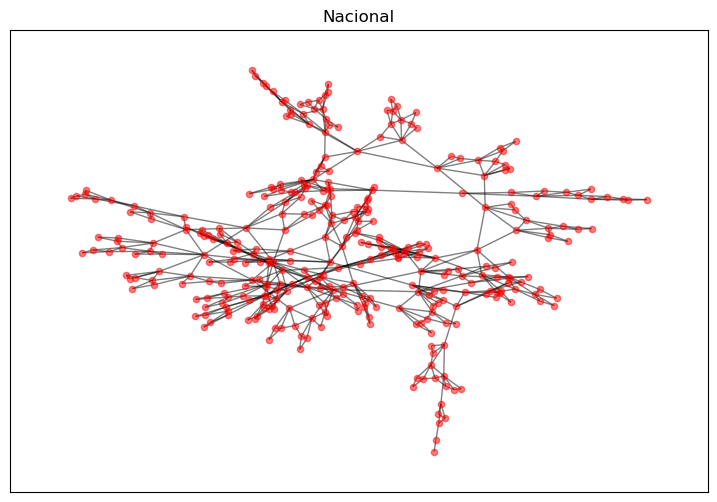

In [103]:
#REVISAR ¿?
plt.figure(figsize=(9,6))

plt.title('Nacional')
#pos = nx.spring_layout(GN)
pos = nx.shell_layout(GN)
nx.draw_networkx(GN, pos=None, with_labels=False, node_size=20, alpha=0.5, node_color='r')


### Gráfico

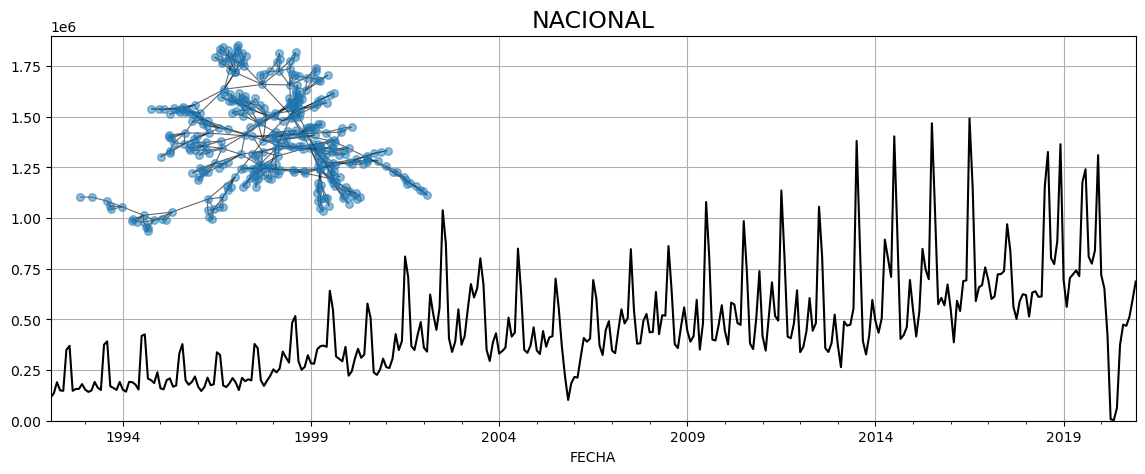

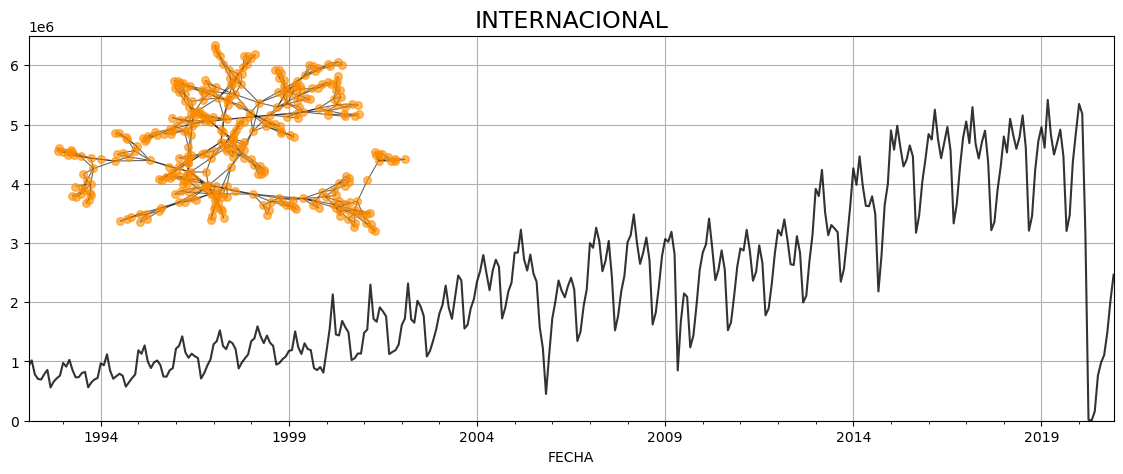

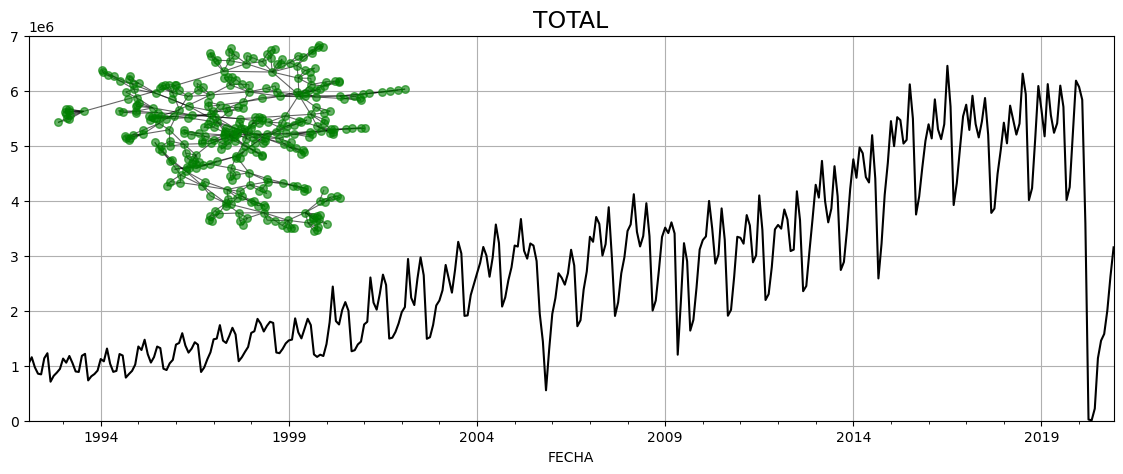

In [142]:
#NACIONAL
fig,ax = plt.subplots(figsize =(14, 5))

plt.title('NACIONAL', size=17)
fil_df['NACIONAL'].plot(color='black')
plt.grid()
ax.set_ylim([0, 1900000])

plt.axes([0.12, 0.45, 0.3, 0.45])
pos = nx.spring_layout(GN)
plt.axis('off')
nx.draw_networkx_nodes(GN, pos=pos, node_size=30, alpha=0.5)
nx.draw_networkx_edges(GN, pos=pos, alpha=0.6, width=0.8)

plt.show()

#INTERNACIONAL
fig,ax = plt.subplots(figsize =(14, 5))
plt.title('INTERNACIONAL', size=17)
fil_df['INTERNACIONAL'].plot(alpha=0.8, color='black')
plt.grid()
ax.set_ylim([0, 6500000])

plt.axes([0.12, 0.45, 0.3, 0.45])
pos = nx.spring_layout(GI)
plt.axis('off')
nx.draw_networkx(GI, pos=pos, node_size=30, alpha=0.6, width=0.8, node_color='darkorange', with_labels=False)

plt.show()

#TOTAL
fig,ax = plt.subplots(figsize =(14, 5))
plt.title('TOTAL', size=17)
fil_df['TOTAL'].plot(color='black')
plt.grid()
ax.set_ylim([0, 7000000])

plt.axes([0.12, 0.45, 0.3, 0.45])
pos = nx.spring_layout(GT)
plt.axis('off')
nx.draw_networkx(GT, pos=pos, node_size=30, alpha=0.6, width=0.8, node_color='green', with_labels=False)

plt.show()

# Distribución de grado

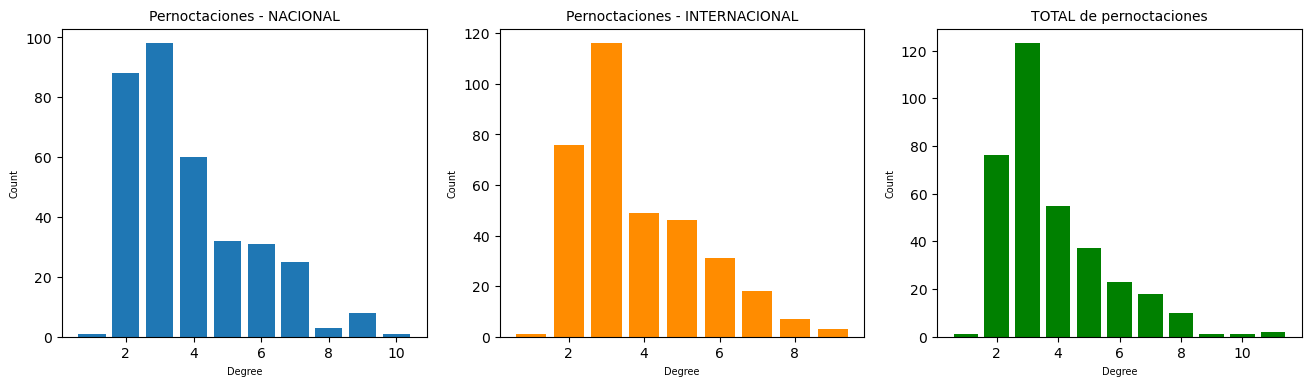

In [143]:
# NACIONAL----------------------------------------------------------------
degree_sequence = sorted([d for n, d in GN.degree()], reverse=True)
degreeCount_N = collections.Counter(degree_sequence)
deg_N, cnt_N = zip(*degreeCount_N.items())

# INTERNACIONAL-----------------------------------------------------------
degree_sequence = sorted([d for n, d in GI.degree()], reverse=True)
degreeCount_I = collections.Counter(degree_sequence)
deg_I, cnt_I = zip(*degreeCount_I.items())

# TOTAL-------------------------------------------------------------------
degree_sequence = sorted([d for n, d in GT.degree()], reverse=True)
degreeCount_T = collections.Counter(degree_sequence)
deg_T, cnt_T = zip(*degreeCount_T.items())
#-------------------------------------------------------------------------

plt.figure(figsize=(16, 4)) 
subax1 = plt.subplot(131)
plt.bar(deg_N, cnt_N, width=0.80, color='tab:blue')
plt.title("Pernoctaciones - NACIONAL", size=10)
plt.ylabel("Count",size=7)
plt.xlabel("Degree",size=7)
ax.set_xticks([d + 0.4 for d in deg_N])
ax.set_xticklabels(deg_N)

subax2 = plt.subplot(132)
plt.bar(deg_I, cnt_I, width=0.80, color='darkorange')
plt.title("Pernoctaciones - INTERNACIONAL", size=10)
plt.ylabel("Count",size=7)
plt.xlabel("Degree",size=7)
ax.set_xticks([d + 0.4 for d in deg_I])
ax.set_xticklabels(deg_I)

subax2 = plt.subplot(133)
plt.bar(deg_T, cnt_T, width=0.80, color='green')
plt.title("TOTAL de pernoctaciones", size=10)
plt.ylabel("Count",size=7)
plt.xlabel("Degree",size=7)
ax.set_xticks([d + 0.4 for d in deg_T])
ax.set_xticklabels(deg_T)

plt.show()

In [145]:
degree_sequence = sorted([d for n, d in GT.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print('TOTAL',degreeCount)

degree_sequence = sorted([d for n, d in GN.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print('NACIONAL',degreeCount)

degree_sequence = sorted([d for n, d in GI.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print('INTERNACIONAL',degreeCount)

TOTAL Counter({3: 123, 2: 76, 4: 55, 5: 37, 6: 23, 7: 18, 8: 10, 11: 2, 10: 1, 9: 1, 1: 1})
NACIONAL Counter({3: 98, 2: 88, 4: 60, 5: 32, 6: 31, 7: 25, 9: 8, 8: 3, 10: 1, 1: 1})
INTERNACIONAL Counter({3: 116, 2: 76, 4: 49, 5: 46, 6: 31, 7: 18, 8: 7, 9: 3, 1: 1})


**Distribución de grados acomulada**

In [146]:
df_N = pd.DataFrame([[key, degreeCount_N[key]] for key in degreeCount_N.keys()], columns=['deg', 'count'])
df_N = df_N.sort_values('deg', ascending=False)

df_I = pd.DataFrame([[key, degreeCount_I[key]] for key in degreeCount_I.keys()], columns=['deg', 'count'])
df_I = df_I.sort_values('deg', ascending=False)

df_T = pd.DataFrame([[key, degreeCount_T[key]] for key in degreeCount_T.keys()], columns=['deg', 'count'])
df_T = df_T.sort_values('deg', ascending=False)


In [147]:
def acumulado(lst):
    result = []
    for i, elem in enumerate(lst):
        if i == 0:
            result.append(elem)
        else:
            result.append(result[i - 1] + elem)
    return result


ac_N = acumulado(df_N['count'])
ac_I = acumulado(df_I['count'])
ac_T = acumulado(df_T['count'])

In [148]:
ac_N = pd.DataFrame(ac_N, columns = ['acom_count'])
ac_I = pd.DataFrame(ac_I, columns = ['acom_count'])
ac_T = pd.DataFrame(ac_T, columns = ['acom_count'])

In [149]:
data_acom_N = pd.concat([ac_N, df_N['deg']], axis=1)
data_acom_I = pd.concat([ac_I, df_I['deg']], axis=1)
data_acom_T = pd.concat([ac_T, df_T['deg']], axis=1)

**Ploteo de la distribución acomulada**

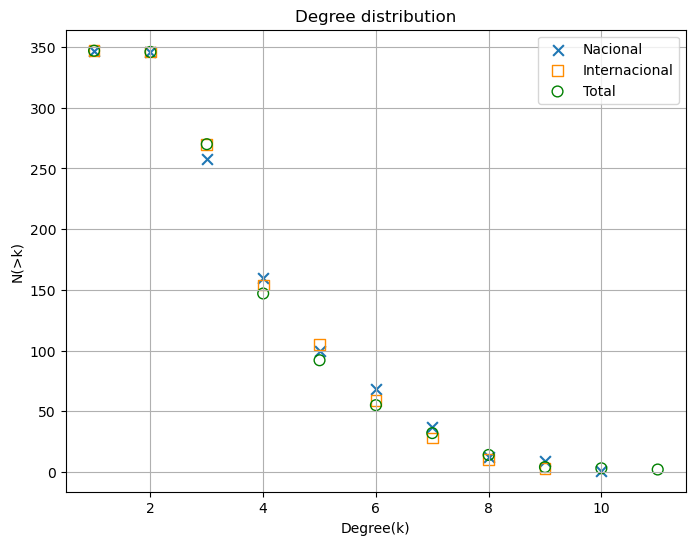

In [150]:
fig, ax = plt.subplots(figsize = (8,6))
plt.title('Degree distribution')
plt.xlabel('Degree(k)')
plt.ylabel('N(>k)')
ax.scatter(data_acom_N['deg'], data_acom_N['acom_count'], marker='x', s=60, label='Nacional')
ax.scatter(data_acom_I['deg'], data_acom_I['acom_count'], marker='s', facecolors='none', edgecolors='darkorange', s=60, label='Internacional')
ax.scatter(data_acom_T['deg'], data_acom_T['acom_count'], marker='o', facecolors='none', edgecolors='g', s=60, label='Total')

ax.legend()
ax.grid()

plt.show()

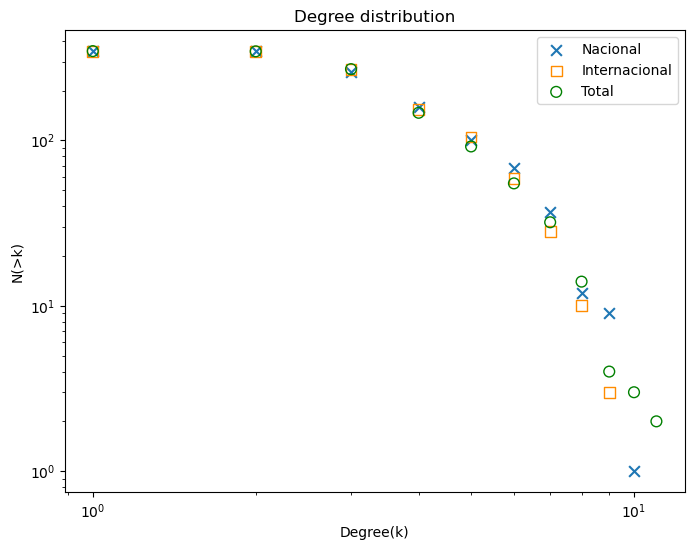

In [151]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.title('Degree distribution')
plt.xlabel('Degree(k)')
plt.ylabel('N(>k)')

ax.scatter(data_acom_N['deg'], data_acom_N['acom_count'], marker='x', s=60, label='Nacional')
ax.scatter(data_acom_I['deg'], data_acom_I['acom_count'], marker='s', facecolors='none', edgecolors='darkorange', s=60, label='Internacional')
ax.scatter(data_acom_T['deg'], data_acom_T['acom_count'], marker='o', facecolors='none', edgecolors='g', s=60, label='Total')

ax.legend()

ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_xlim([0, 20])

plt.show()

# Determinación del comportamiento

De la distribución obtenida anteriormente a través del algoritmo gráfico de visibilidad horizontal, tenemos que el número de nodos $N(>k)$ sigue la relación: $N(k)\sim e^{-k\lambda}$ donde el parámetro $\lambda_c = ln(3/2) = 0.404$, además se cumple que, 
$$\text{Caótico si}\hspace{0.5cm}\lambda < \lambda_c$$
$$\text{Predecible si} \hspace{0.5cm}\lambda < \lambda_c$$
De la relación podemos ver que $ln(N(k))\sim -k\lambda$, por lo tanto al graficar $y = ln(N(k))$ tendremos que la pendiente es igual a $\lambda$

In [152]:
datos_N = pd.DataFrame({'k_N': data_acom_N['deg'], 'N(k)_N':data_acom_N['acom_count']})
datos_I = pd.DataFrame({'k_I': data_acom_I['deg'], 'N(k)_I':data_acom_I['acom_count']})
datos_T = pd.DataFrame({'k_T': data_acom_T['deg'], 'N(k)_T':data_acom_T['acom_count']})

datos_N['ln_N(k)_N'] = np.log(datos_N['N(k)_N']) 
datos_I['ln_N(k)_I'] = np.log(datos_I['N(k)_I']) 
datos_T['ln_N(k)_T'] = np.log(datos_T['N(k)_T']) 


In [153]:
datos_N

,k_N,N(k)_N,ln_N(k)_N
0,10,1,0.000000
1,9,9,2.197225
2,8,12,2.484907
3,7,37,3.610918
4,6,68,4.219508
5,5,100,4.605170
6,4,160,5.075174
7,3,258,5.552960
8,2,346,5.846439
9,1,347,5.849325


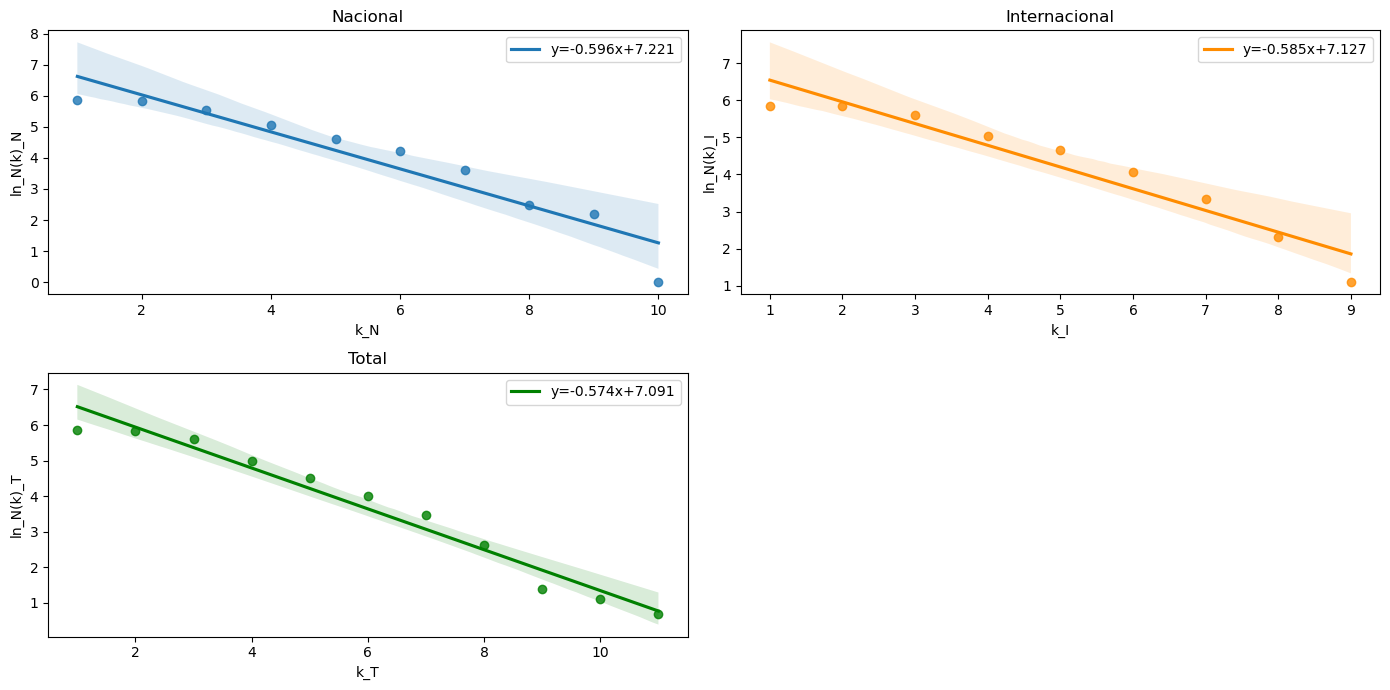

In [162]:
plt.figure(figsize=(14,7))

subax1 = plt.subplot(221)
plt.title('Nacional')
slope, intercept, r_value, p_value, std_err = stats.linregress(datos_N['k_N'],datos_N['ln_N(k)_N'])
ax_N = sns.regplot(x="k_N", y="ln_N(k)_N", data=datos_N, 
        line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)}, ax=subax1)

subax2 = plt.subplot(222)
plt.title('Internacional')
slope, intercept, r_value, p_value, std_err = stats.linregress(datos_I['k_I'],datos_I['ln_N(k)_I'])
ax_I = sns.regplot(x="k_I", y="ln_N(k)_I", data=datos_I, color='darkorange', 
        line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)},ax=subax2)

subax3 = plt.subplot(223)
plt.title('Total')
slope, intercept, r_value, p_value, std_err = stats.linregress(datos_T['k_T'],datos_T['ln_N(k)_T'])
ax_T = sns.regplot(x="k_T", y="ln_N(k)_T", data=datos_T, color='green', 
        line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)},ax=subax3)


ax_N.legend()
ax_I.legend()
ax_T.legend()

plt.tight_layout()
plt.show()

# Resultados

#### Pre-COVID (<2020)

$$\lambda_{Nacional} = 0.590$$
$$\lambda_{Internacional} = 0.615$$
$$\lambda_{Total} = 0.555$$

#### Todos los datos 

$$\lambda_{Nacional} = 0.596$$
$$\lambda_{Internacional} = 0.585$$
$$\lambda_{Total} = 0.574$$

Los resultados obtenidos muestran que al conciderar los datos de la pandemia el valor de $\lambda_{Nacional}$ no varía mucho,pero para el caso de $\lambda_{Internacional}$ si encontramos una diferencia más significativa y con un valor menor. Esto quiere decir que si consideramos los datos de la pandemia el comportamiento es menos predecible, sin embargo, debido a a que solamente se cuenta con 11 datos pertenecientes al pos-COVID, el comportamiento no llega a ser caótico. Siguiendo estos resultados se puede concluir que para datos del 2021 el valor para $\lambda_{Internacional}$ disminuiría aún más. 

<AxesSubplot:xlabel='FECHA'>

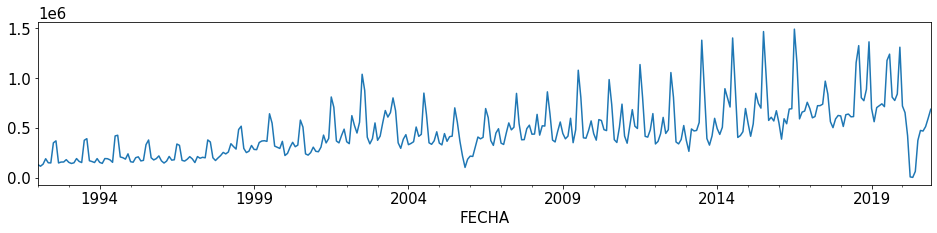

In [243]:
fix, ax = plt.subplots(figsize=(16,3))
data['NACIONAL'].plot(ax=ax)

<AxesSubplot:xlabel='FECHA'>

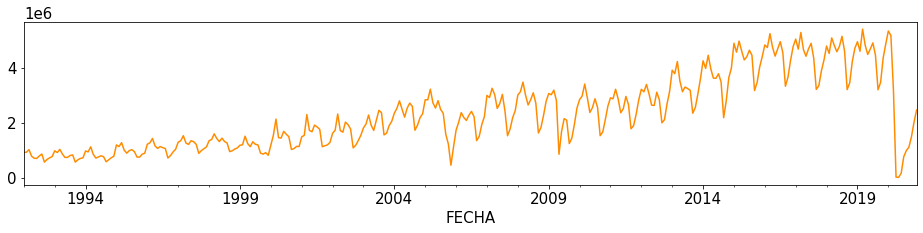

In [244]:
fix, ax = plt.subplots(figsize=(16,3))
data['INTERNACIONAL'].plot(ax=ax, color='darkorange')

Vemos que para el caso Nacional la curva tiene una caída pronunciada pero no tan significativa como el caso Internacional, esto puede ser debido a...

Para el comportamiento Total...

<AxesSubplot:xlabel='FECHA'>

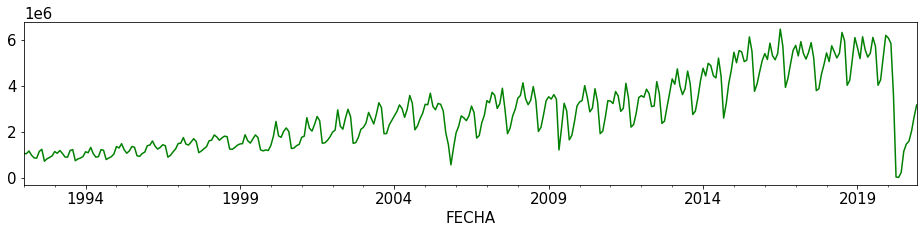

In [245]:
fix, ax = plt.subplots(figsize=(16,3))
data['TOTAL'].plot(ax=ax, color='green')

# Detección de anomalias

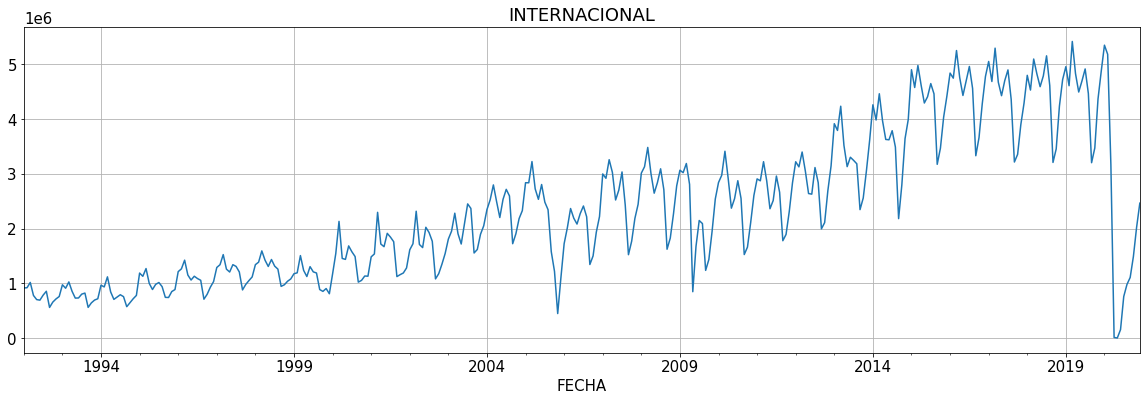

In [246]:
df_n = data['NACIONAL']
df_i = data['INTERNACIONAL']
df_t = data['TOTAL']

df_i.plot(figsize = (20,6))
plt.title('INTERNACIONAL')
plt.grid()
plt.show()

### Método 1

In [247]:
window_percentage = 15
k = int(len(df_i) * (window_percentage/2/100))
N = len(df_i)

time = np.arange(0,N)

In [248]:
data_i = df_i.to_numpy() #Aquí lo estamos convirtiendo en un array 

In [249]:
get_bands = lambda data : (np.mean(data) + 2*np.std(data),np.mean(data) - 2*np.std(data))

bands = [get_bands(data_i[range(0 if i-k<0 else i-k ,i+k if i+k<N else N)]) for i in range(0,N)]
upper, lower = zip(*bands)

anomalies = (data_i > upper) | (data_i < lower)

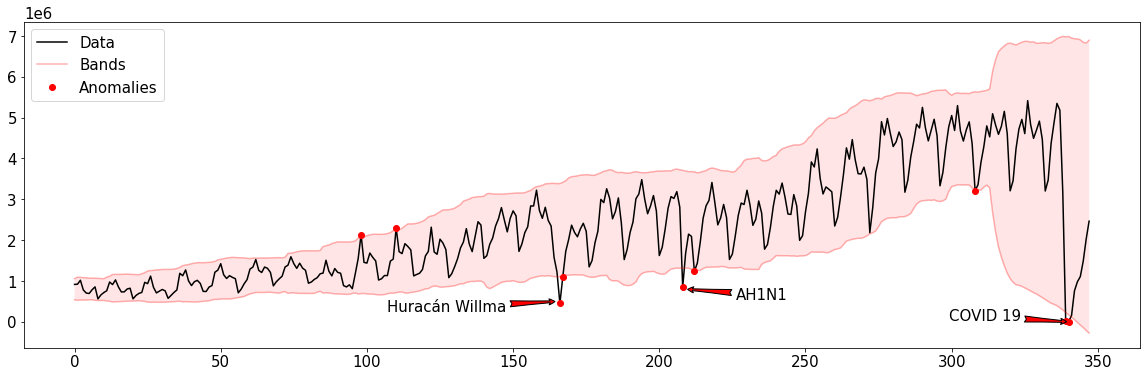

In [250]:
plt.figure(figsize=(20,6))
plt.plot(time,data_i,'k',label='Data')
plt.plot(time,upper,'r-',label='Bands',alpha=0.3)
plt.plot(time,lower,'r-',alpha=0.3)

plt.plot(time[anomalies],data_i[anomalies],'ro',label='Anomalies')
plt.fill_between(time, upper, lower,facecolor='red',alpha=0.1)

plt.annotate('COVID 19', xy=(340,0.1), xycoords='data',
             xytext=(-120,1), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))
plt.annotate('Huracán Willma', xy=(165,500000), xycoords='data',
             xytext=(-170,-10), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))

plt.annotate('AH1N1', xy=(209,800000), xycoords='data',
             xytext=(50,-10), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))

plt.legend()

plt.show()

In [251]:
df_i.index[anomalies]

DatetimeIndex(['2000-03-01', '2001-03-01', '2005-11-01', '2005-12-01',
               '2009-05-01', '2009-09-01', '2017-09-01', '2020-04-01',
               '2020-05-01'],
              dtype='datetime64[ns]', name='FECHA', freq=None)

### Método 2

In [252]:
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (16.0, 6.0)

In [253]:
df_i = pd.DataFrame(df_i)

<Figure size 1440x432 with 0 Axes>

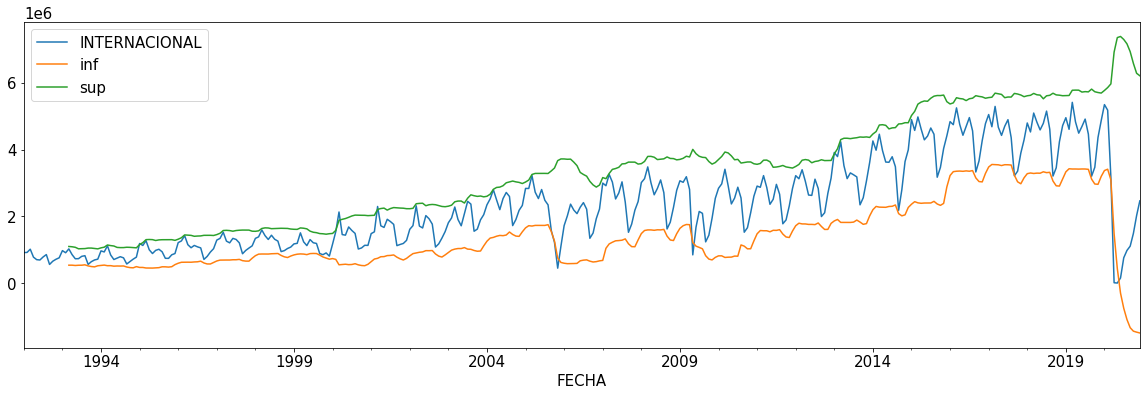

In [254]:
wind = 15
sigma = 2

plt.figure(figsize=(20,6))

df_i["inf"] =df_i['INTERNACIONAL'].rolling(window=wind)\
    .mean() - (sigma * df_i['INTERNACIONAL'].rolling(window=wind).std())
df_i["sup"] = df_i['INTERNACIONAL'].rolling(window=wind)\
    .mean() + (sigma * df_i['INTERNACIONAL'].rolling(window=wind).std())
df_i.plot()

plt.show()

Text(50, -60, 'AH1N1')

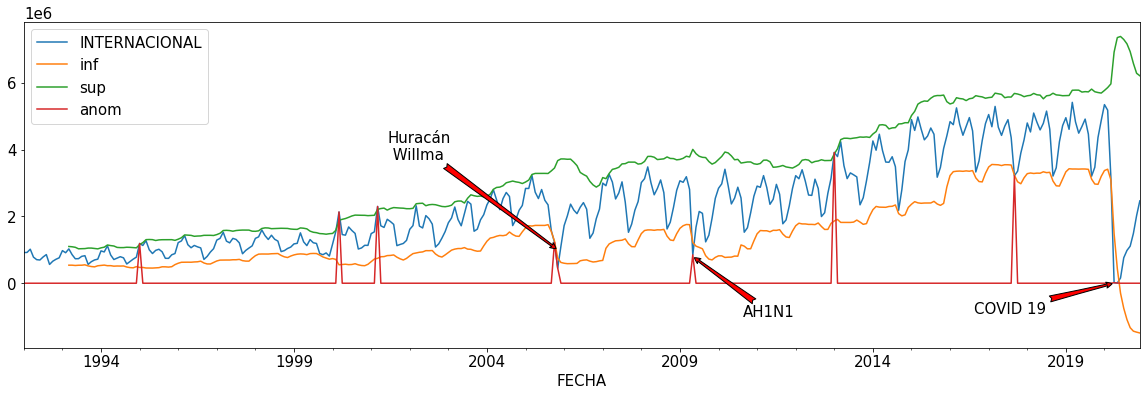

In [255]:
df_i["anom"] = df_i.apply(
    lambda row: row["INTERNACIONAL"] if (row["INTERNACIONAL"]<=row["inf"] or row["INTERNACIONAL"]>=row["sup"]) else 0
, axis=1)

df_i.plot()

plt.annotate('COVID 19', xy=(603,0.1), xycoords='data',
             xytext=(-140,-30), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))
plt.annotate('Huracán\n Willma', xy=(430,1000000), xycoords='data',
             xytext=(-170,90), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))

plt.annotate('AH1N1', xy=(472,800000), xycoords='data',
             xytext=(50,-60), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))

In [256]:
anoma = []
for i in range(len(df_i)):
    if df_i['anom'][i] != 0:
        anoma.append(df_i.index[i])
anoma

[Timestamp('1995-01-01 00:00:00'),
 Timestamp('2000-03-01 00:00:00'),
 Timestamp('2001-03-01 00:00:00'),
 Timestamp('2005-10-01 00:00:00'),
 Timestamp('2005-11-01 00:00:00'),
 Timestamp('2009-05-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00')]

### Descomposición de la serie

In [257]:
from scipy import stats
import matplotlib.dates as mdates
import scipy.signal.signaltools
from statsmodels.tsa.seasonal import seasonal_decompose

def _centered(arr, newsize):
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

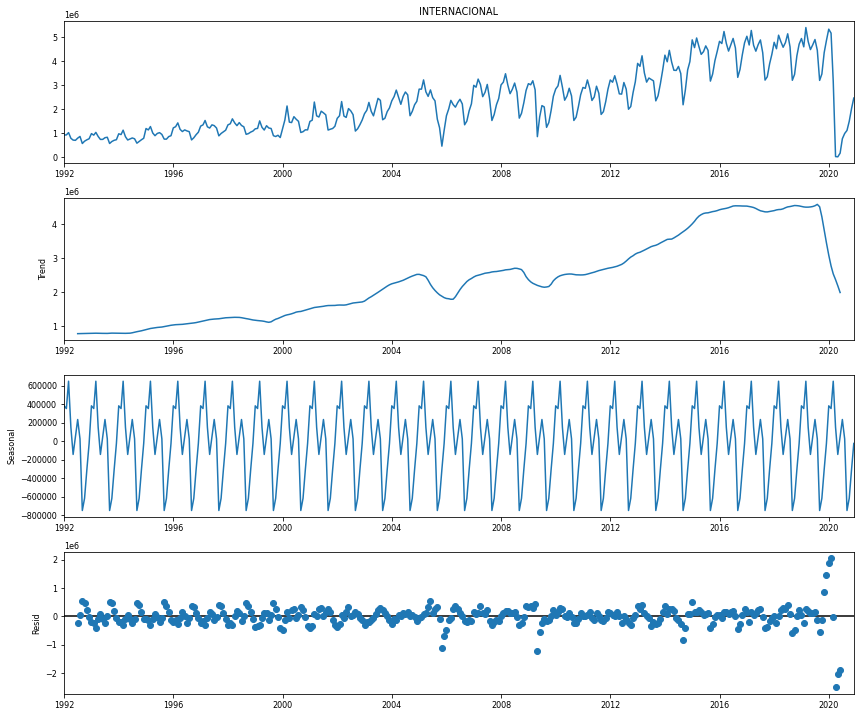

In [258]:
plt.rc('figure',figsize=(12,10))
plt.rc('font',size=8)

result = seasonal_decompose(data['INTERNACIONAL'],model='additive')
fig = result.plot()

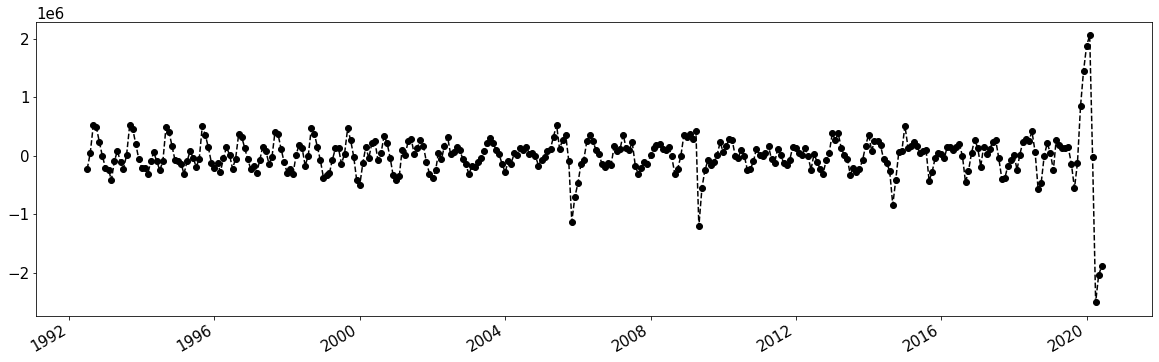

In [349]:
plt.rc('figure',figsize=(20,6))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')



fig.autofmt_xdate()
plt.show()

### Método 1 con residuo

In [260]:
res_i = pd.DataFrame(x)
res_i['residuo_internacional'] = pd.DataFrame(y)
res_i = res_i.set_index('FECHA')
res_i = res_i.dropna()
res_i = res_i['residuo_internacional']

In [261]:
data_i = res_i.to_numpy()

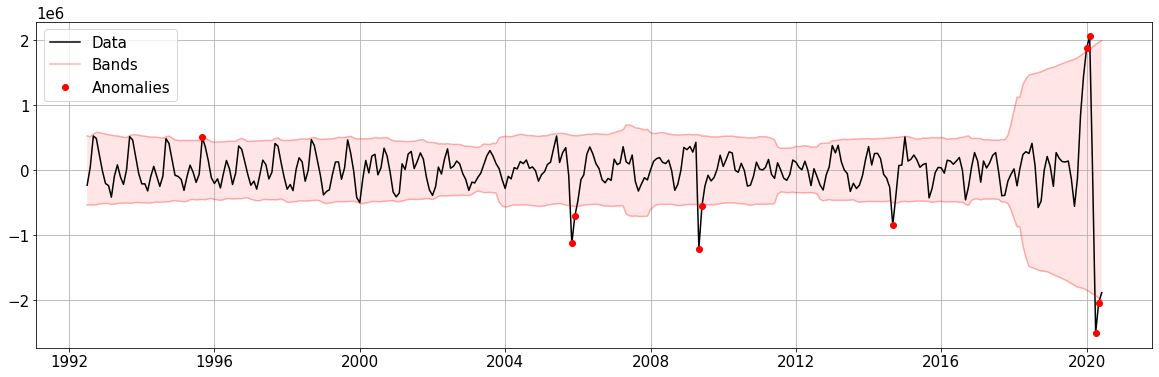

In [396]:
window_percenta = 15
k = int(len(data_i) * (window_percentage/2/100))
N = len(data_i)

time = np.arange(0,N)

get_bands = lambda data : (np.mean(data) + 2*np.std(data),np.mean(data) - 2*np.std(data))

bands = [get_bands(data_i[range(0 if i-k<0 else i-k ,i+k if i+k<N else N)]) for i in range(0,N)]
upper, lower = zip(*bands)

anomalies = (data_i > upper) | (data_i < lower)

plt.figure(figsize=(20,6))
plt.plot(res_i.index,data_i,'k',label='Data')
plt.plot(res_i.index,upper,'r-',label='Bands',alpha=0.3)
plt.plot(res_i.index,lower,'r-',alpha=0.3)

plt.plot(res_i.index[anomalies],data_i[anomalies],'ro',label='Anomalies')
plt.fill_between(res_i.index, upper, lower,facecolor='red',alpha=0.1)


#plt.annotate('Anomaly', (mdates.date2num(x[340]), y[-340]), xytext=(-100, 20), 
 #          textcoords='offset points', color='black',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

plt.annotate('COVID 19', xy=(3,-1), xycoords='data',
             xytext=(-12,1), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))

plt.legend()
plt.grid()
plt.show()

In [263]:
res_i.index[anomalies]

DatetimeIndex(['1995-09-01', '2005-11-01', '2005-12-01', '2009-05-01',
               '2009-06-01', '2014-09-01', '2020-01-01', '2020-02-01',
               '2020-04-01', '2020-05-01'],
              dtype='datetime64[ns]', name='FECHA', freq=None)

In [264]:
res_i.index[anomalies]

DatetimeIndex(['1995-09-01', '2005-11-01', '2005-12-01', '2009-05-01',
               '2009-06-01', '2014-09-01', '2020-01-01', '2020-02-01',
               '2020-04-01', '2020-05-01'],
              dtype='datetime64[ns]', name='FECHA', freq=None)

### Método 2  con residuo

In [265]:
res_i = pd.DataFrame(res_i)

<AxesSubplot:xlabel='FECHA'>

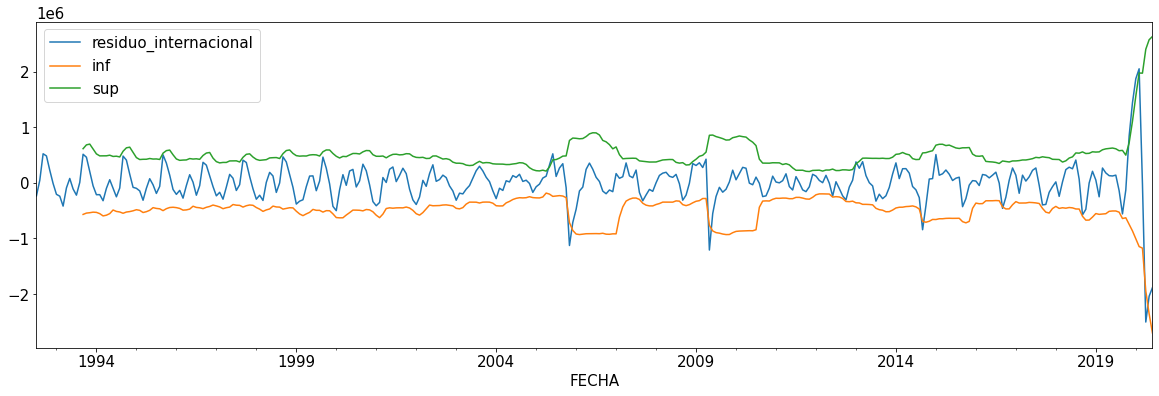

In [266]:
wind = 15
sigma = 2

res_i["inf"] = res_i['residuo_internacional'].rolling(window=wind)\
    .mean() - (sigma * res_i['residuo_internacional'].rolling(window=wind).std())
res_i["sup"] = res_i['residuo_internacional'].rolling(window=wind)\
    .mean() + (sigma * res_i['residuo_internacional'].rolling(window=wind).std())
res_i.plot()

Text(50, -10, 'AH1N1')

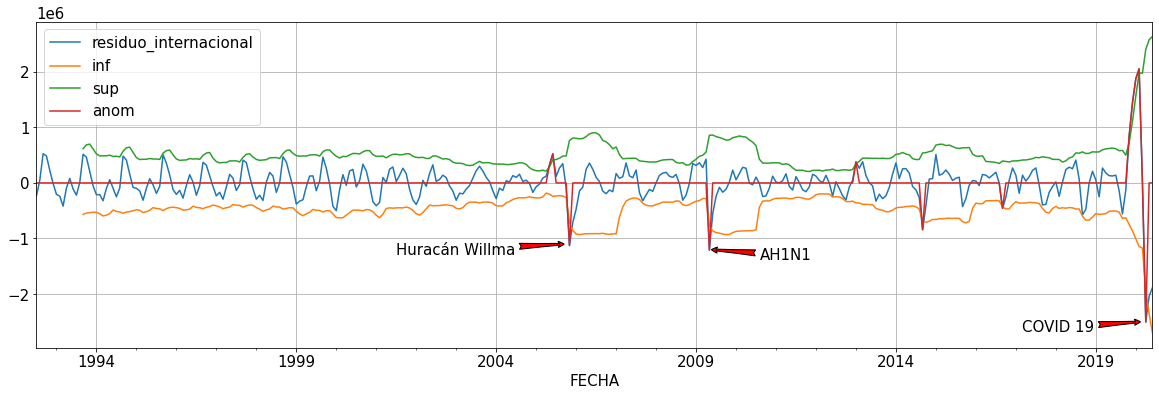

In [325]:
res_i["anom"] = res_i.apply(
    lambda row: row["residuo_internacional"] if (row["residuo_internacional"]<=row["inf"] or row["residuo_internacional"]>=row["sup"]) else 0
, axis=1)
res_i.plot()
plt.grid()

plt.annotate('COVID 19', xy=(602,-2500000), xycoords='data',
             xytext=(-120,-10), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))
plt.annotate('Huracán Willma', xy=(429,-1100000), xycoords='data',
             xytext=(-170,-10), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))

plt.annotate('AH1N1', xy=(472,-1200000), xycoords='data',
             xytext=(50,-10), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='fancy'))


In [268]:
anoma = []
for i in range(len(res_i)):
    if res_i['anom'][i] != 0:
        anoma.append(res_i.index[i])
anoma

[Timestamp('2005-05-01 00:00:00'),
 Timestamp('2005-06-01 00:00:00'),
 Timestamp('2005-11-01 00:00:00'),
 Timestamp('2009-05-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2014-09-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00')]